In [17]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

In [18]:
dirname = os.path.abspath(os.curdir) + r'/data/'

rainfall = pd.read_csv(path.join(os.sep, dirname, 'Annual rainfall at fortaleza Brazil 18491979.csv'), index_col=0)

rainfall.index = rainfall.index.map(lambda x: int(x) + 1848)

In [45]:
rainfall.head()

,x
1849,2001
1850,852
1851,1806
1852,1356
1853,1233


In [46]:
rainfall.describe()

,x
count,131.000000
mean,1425.206107
std,481.974636
min,468.000000
25%,1094.000000
50%,1399.000000
75%,1735.500000
max,2512.000000


In [19]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1)

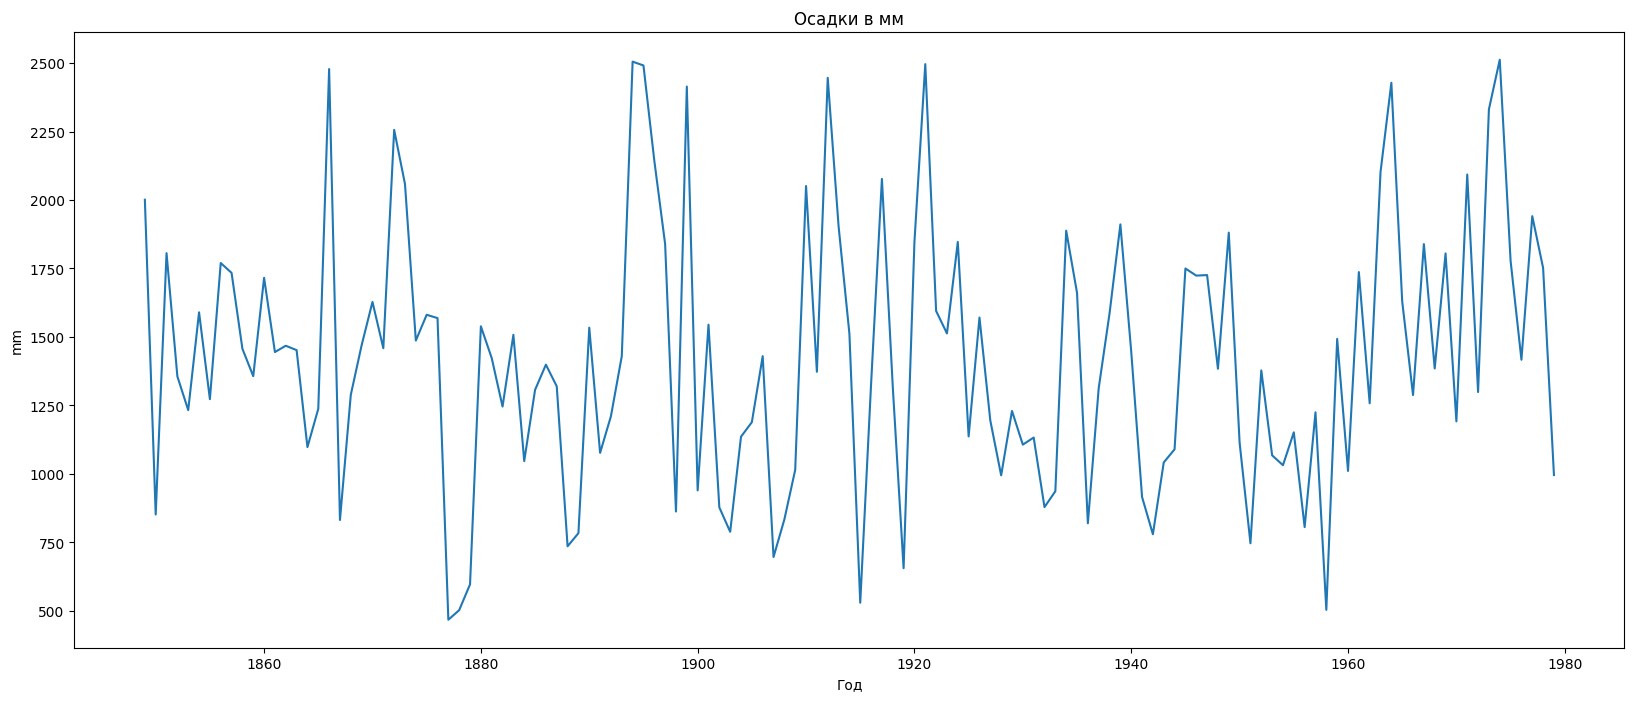

In [21]:
fig, axs = plt.subplots(1,1,figsize=(20, 8))

plot_assignation(axs, rainfall["x"], 'Год', 'mm', 'Осадки в мм')


## Выделение закономерных (неслучайных) составляющих временного ряда

### Разложения ряда на компоненты

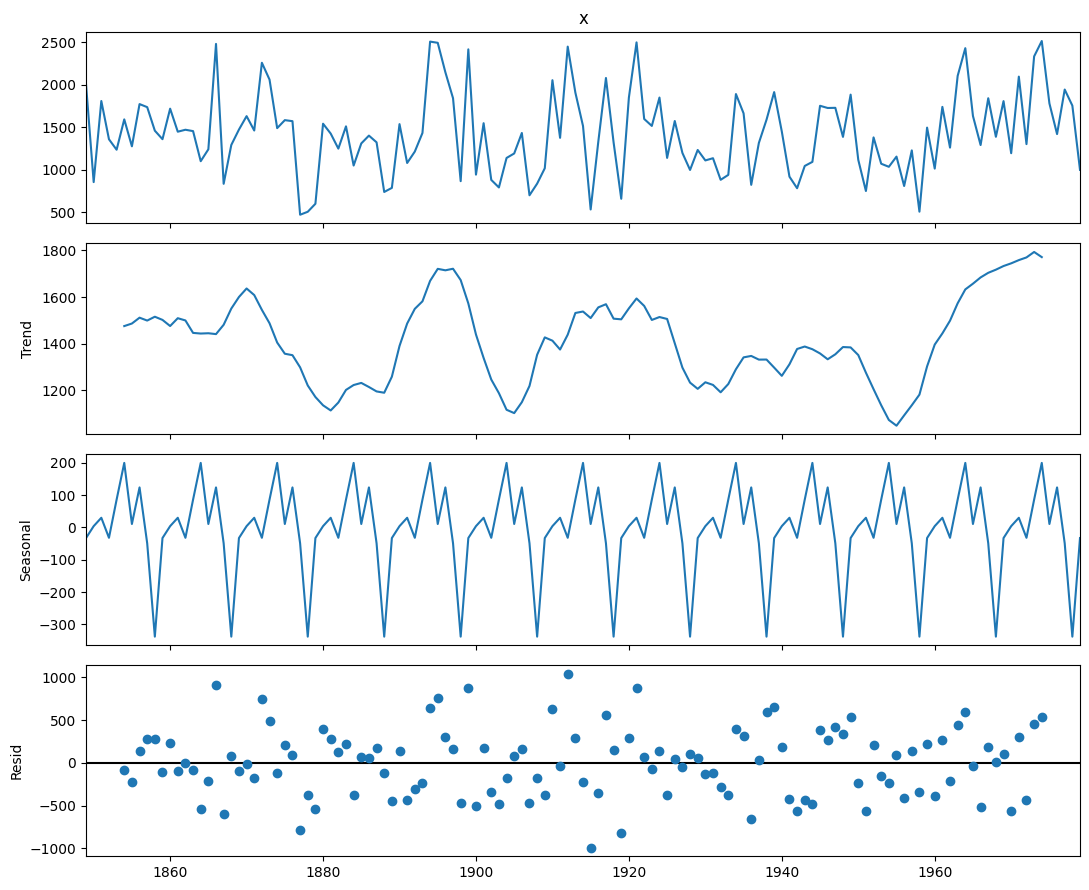

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(rainfall['x'], period=10)
decompose.plot()
plt.show()

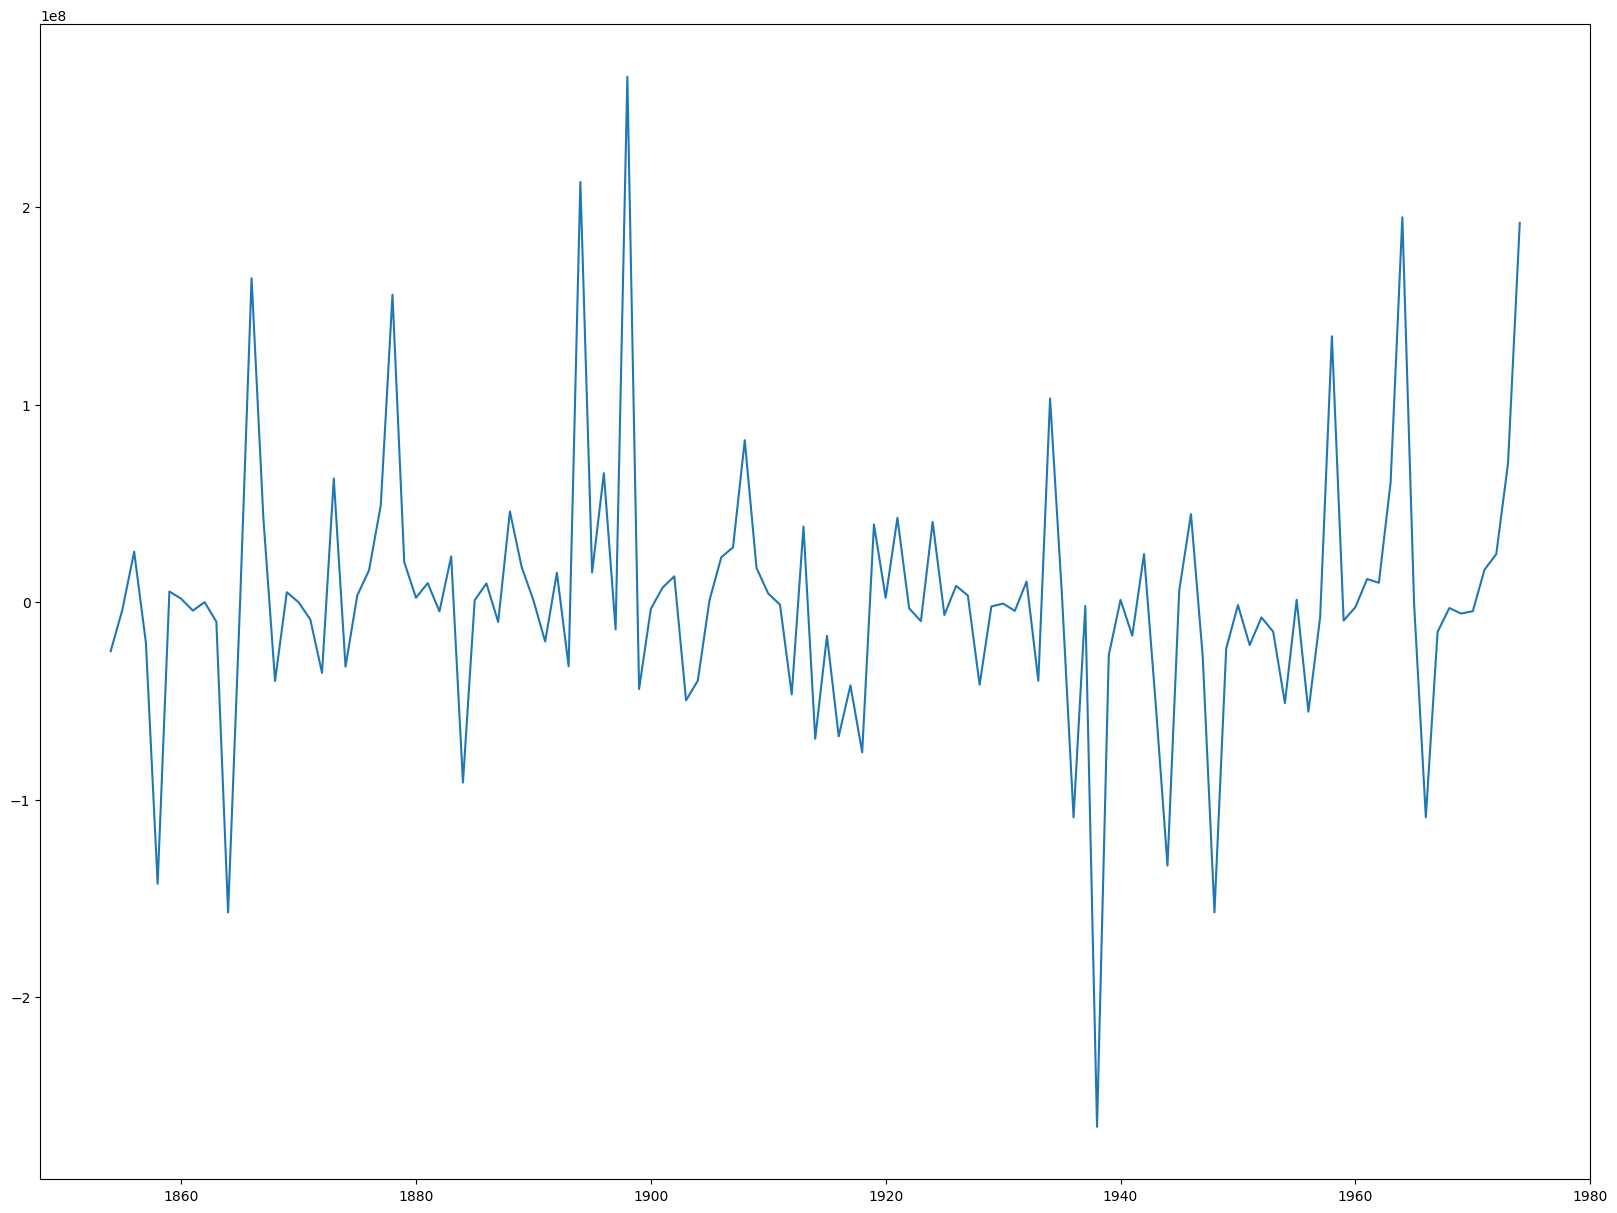

In [23]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))

plt.plot(new_ps)
plt.show()

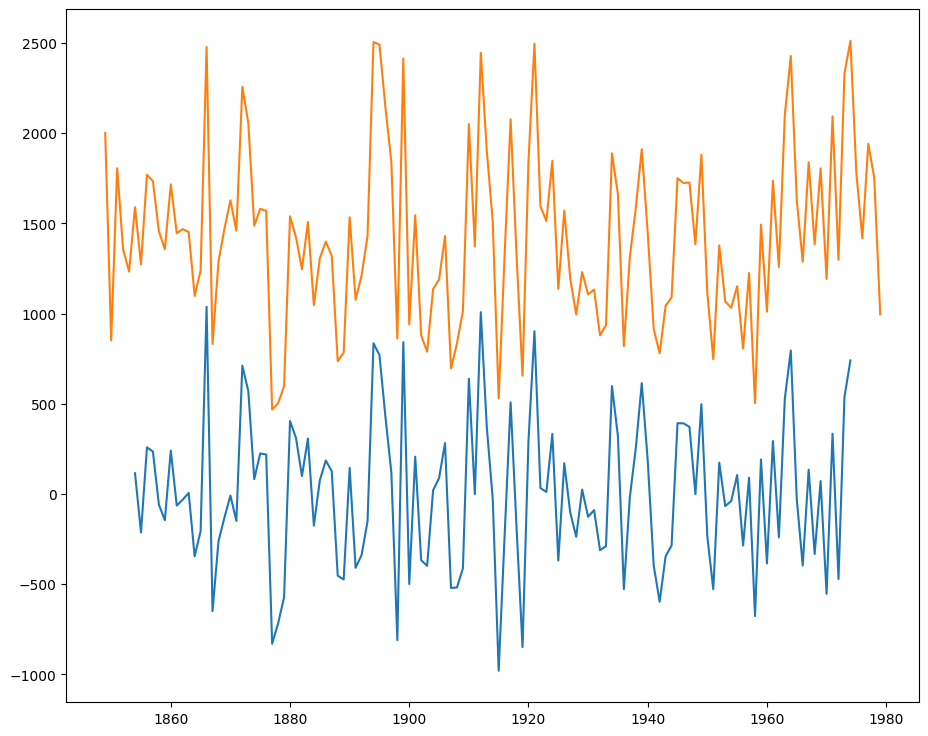

In [24]:
rainfall_r = rainfall['x'] - decompose.trend

rainfall_r.plot()
rainfall['x'].plot()
plt.show()

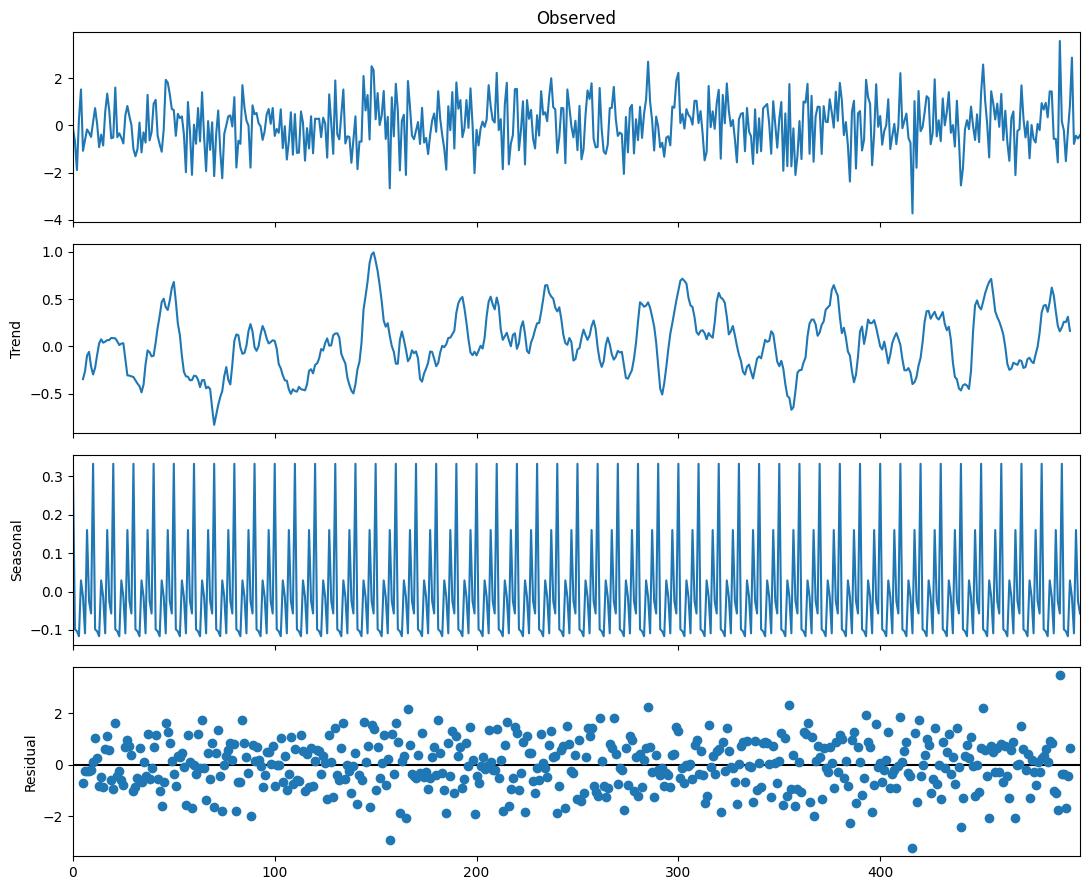

In [25]:
import numpy as np
white_noise = np.random.normal(0,1, 500)

decompose = seasonal_decompose(white_noise, period=10, model="additive")
decompose.plot()
plt.show()

## Стационарный процесс

In [26]:
from statsmodels.tsa.stattools import adfuller

In [29]:
alpha = 0.05
name = 'Тест Дики-Фуллера'
ts = rainfall['x']

dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Test Statistic                -8.868440e+00
p-value                        1.419369e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


## Тренд

In [ ]:
window = 30

rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

plt.plot(rolling_mean, 'g', label='MA'+str(window), color="red")

lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')

plt.grid(True)
plt.show()

## Сезонность

### Автокорреляция

In [33]:
import statsmodels.tsa.api as smt

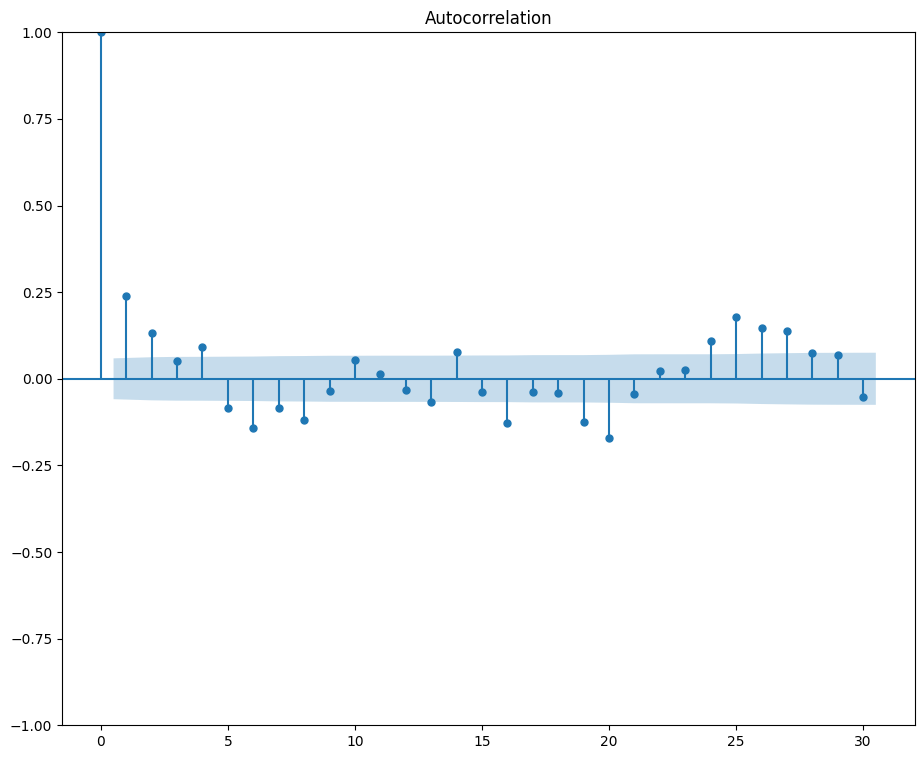

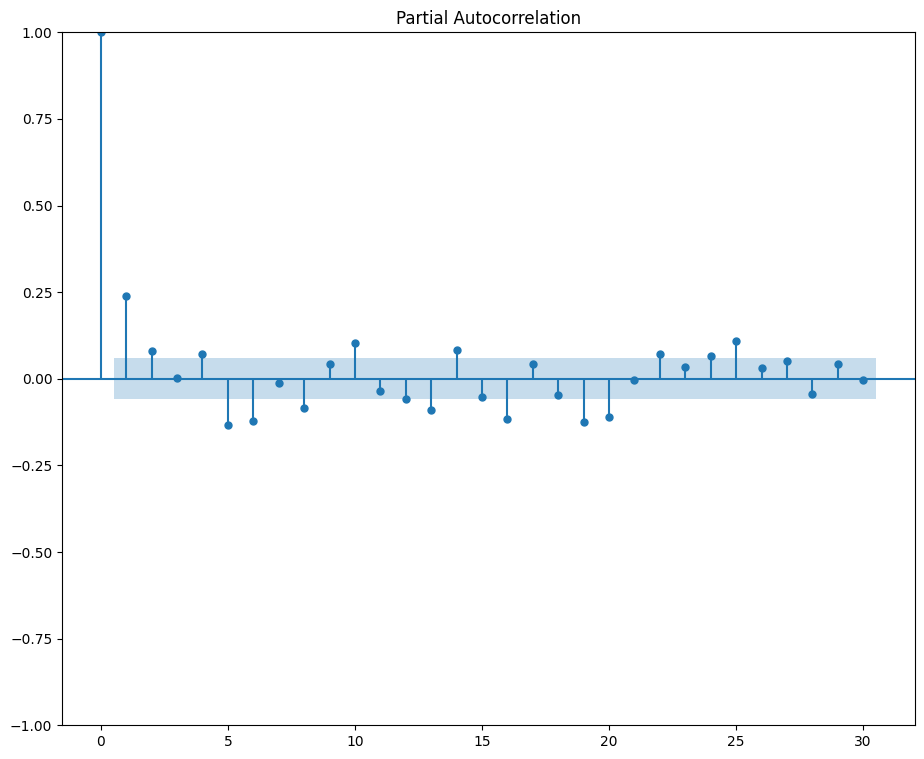

In [38]:
ts = rainfall['x']

# fig, ax = plt.subplots(figsize=(12,5))

sc_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

plt.show()

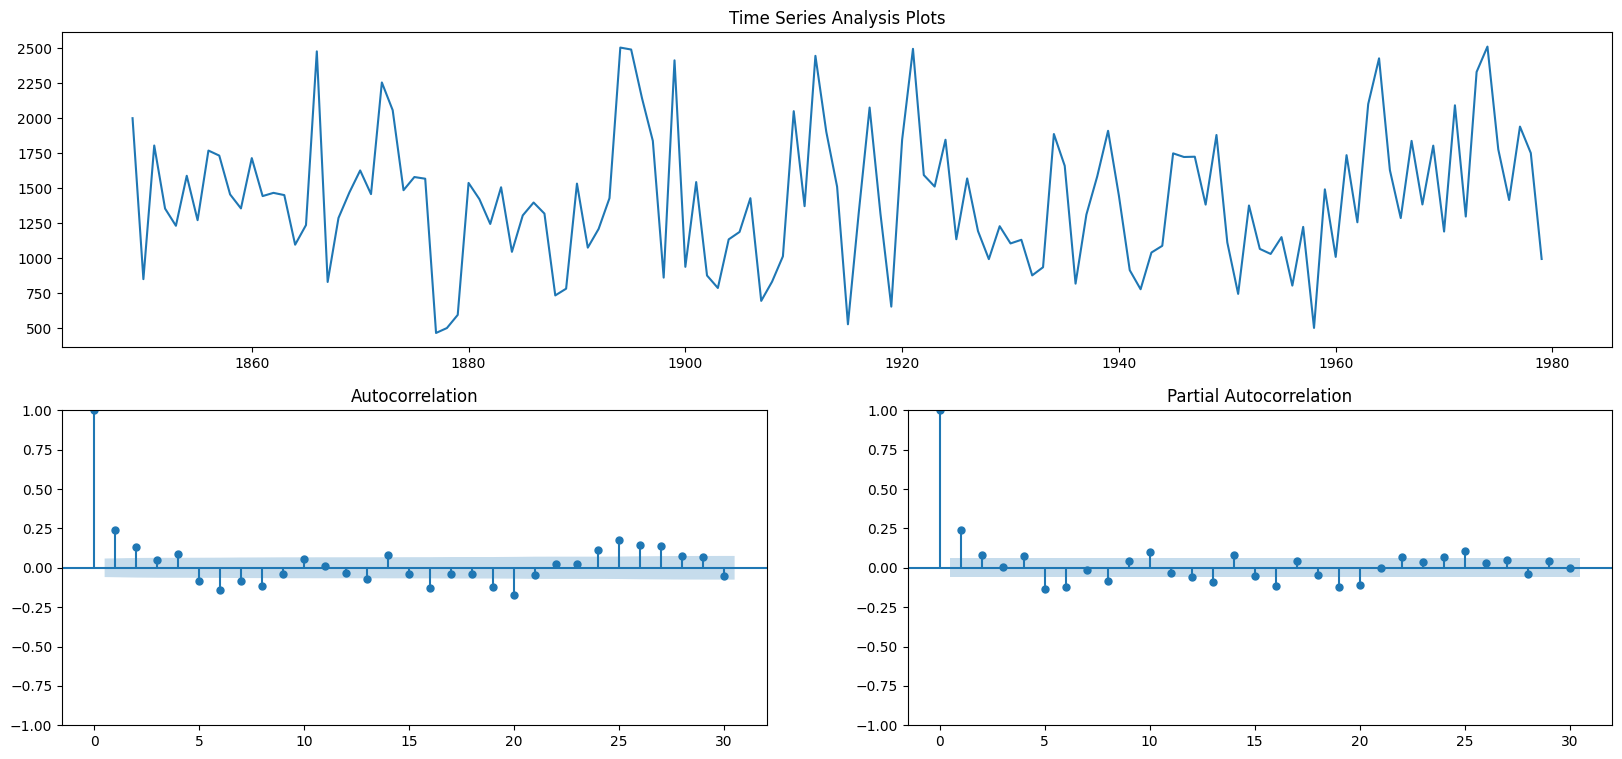

In [44]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)

plt.show()